#### Discrete Simulation HW1
#### Problem 2
Authored: Austin Jetrin Maddison 6481268

In [797]:
from my_settings import *

In [ ]:
np.random.seed(27)

In [1118]:
def run_sim(n: int, N: int) -> float: 
    def bob():
        buttons = [lambda x : np.random.randint(1, 99 + 1, x), lambda x : np.random.randint(2, 100 + 1, x)]
        i = np.random.randint(0, 2)
        return buttons[i] , i+1

    def alice_strategy(n, button):
        if n == 0:
            return np.random.randint(0, 2)
        
        xs = button((n, 1))
    
	    # Case 1: Found exclusive output.
        if np.count_nonzero(xs == 1) >= 1:  
            return 1
        if np.count_nonzero(xs == 100) >= 1:  
            return 2
    
        # Case 2: No exclusive output. Evaluate the minimum distance of means.
        x_mean = np.mean(xs)
        button_1_mean = (1 + 99) / 2
        button_2_mean = (2 + 100) / 2
    
        return np.argmin([abs(x_mean - button_1_mean), abs(x_mean - button_2_mean)]) + 1

    def run_iteration(n):
        btn, real_ans = bob()
        return real_ans == alice_strategy(n, btn)  # Whether alice is correct

    Ns = np.ones((N, 1), dtype=bool)
    Ns_alices_correct = np.apply_along_axis(lambda x : run_iteration(n) ,1, Ns)

    return Ns_alices_correct.mean()
    

In [1181]:
N = 100000
run_sim_vec = np.vectorize(lambda x: run_sim(x, N))
ns = np.arange(500, dtype=int)
ps = run_sim_vec(ns)

KeyboardInterrupt: 

In [1133]:
n = np.argmin(np.abs((np.ones(np.shape(ns)) * 0.99) - ps))
intersection  = (n, ps[n].item())
print(f'n={intersection[0]} = {intersection[1]}')

n=375 = 0.99


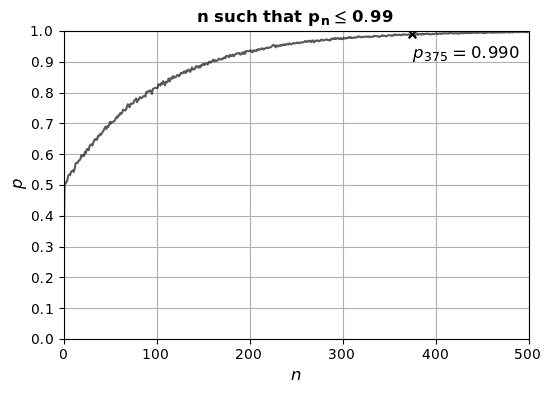

In [1179]:
plt.figure(figsize=(6, 4))
plt.plot(ns, ps, 'k', alpha=0.65)
plt.grid()
plt.scatter(intersection[0], intersection[1], s=30, color='k', marker='x')
plt.annotate(f"$p_{{{n}}} = {{{intersection[1]:.3f}}} $",(intersection[0], intersection[1]-0.08), fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1, dtype=float))
plt.xlim(0, 500)
plt.ylim(0.0, 1)
plt.title("$\\mathbf{ \\textbf{n such that }p_{n} \le 0.99}$", fontsize=12)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$p$", fontsize=12)
plt.savefig("tex/p2_1.svg")

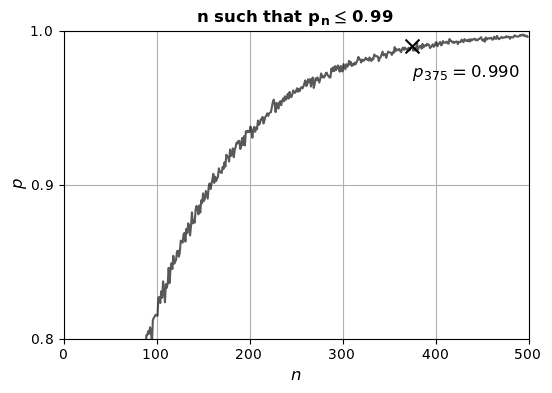

In [1180]:
plt.figure(figsize=(6, 4))
# plt.axvline(intersection[0], alpha=0.3, color='k')
# plt.axhline(intersection[1], alpha=0.3, color='k')
plt.plot(ns, ps, 'k', alpha=0.65)
plt.grid()
plt.scatter(intersection[0], intersection[1], s=100, color='k', marker='x')
plt.annotate(f"$p_{{{n}}} = {{{intersection[1]:.3f}}} $",(intersection[0], intersection[1]-0.02), fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1, dtype=float))
plt.xlim(0, 500)
plt.ylim(0.8, 1.0)
plt.title("$\\mathbf{ \\textbf{n such that }p_{n} \le 0.99}$", fontsize=12)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$p$", fontsize=12)
plt.savefig("tex/p2_2.svg")